<a href="https://colab.research.google.com/github/rajaganaa/ML_Industrial_HR_Geo_Visualisation/blob/main/part_2_Industrial_HR_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NLP PART

In [ ]:
"""
Use Natural Language Processing for analyzing the various core industries and group the business categories like Retail, Poultry,
Agriculture, Manufacturing, etc.
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/HR_1.csv')

In [ ]:
df

State Code  District Code           India/States  Division  Group  \
0               30              0            STATE - GOA         0      0   
1               30              0            STATE - GOA         1      0   
2               30              0            STATE - GOA         1     14   
3               30              0            STATE - GOA         1     14   
4               30              0            STATE - GOA         1     16   
...            ...            ...                    ...       ...    ...   
195140          21            399  District - Malkangiri        99      0   
195141          21            399  District - Malkangiri        99    991   
195142          21            399  District - Malkangiri        99    991   
195143          21            399  District - Malkangiri        99    992   
195144          21            399  District - Malkangiri        99    992   

        Class  \
0           0   
1           0   
2           0   
3         141   
4           0   
...       ...   
195140      0   
195141      0   
195142   9910   
195143      0   
195144   9920   

                                                                  NIC Name  \
0                                                                    Total   
1       Crop and animal production, hunting and related service activities   
2                                                        Animal production   
3                                          Raising of cattle and buffaloes   
4       Support activities to agriculture and post-harvest crop activities   
...                                                                    ...   
195140             Activities of extraterritorial organizations and bodies   
195141                                                               Blank   
195142                                                               Blank   
195143                           Incomplete description/ Wrongly Classifed   
195144                           Incomplete description/ Wrongly Classifed   

        Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                                  7573                          5536   
1                                    12                             8   
2                                     4                             0   
3                                     4                             0   
4                                     8                             8   
...                                 ...                           ...   
195140                              574                           315   
195141                              435                           266   
195142                              435                           266   
195143                              139                            49   
195144                              139                            49   

        Main Workers - Total - Females  ...  \
0                                 2037  ...   
1                                    4  ...   
2                                    4  ...   
3                                    4  ...   
4                                    0  ...   
...                                ...  ...   
195140                             259  ...   
195141                             169  ...   
195142                             169  ...   
195143                              90  ...   
195144                              90  ...   

        Marginal Workers - Total - Females  \
0                                      759   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
195140                                 928   
195141                                 384   
195142                                 384   
195143                                 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  int64 
 1   District Code                        195145 non-null  int64 
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  int64 
 4   Group                                195145 non-null  int64 
 5   Class                                195145 non-null  int64 
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [ ]:
df["NIC Name"].unique()

array(['Total',
       'Crop and animal production, hunting and related service activities',
       'Animal production', 'Raising of cattle and buffaloes',
       'Support activities to agriculture and post-harvest crop activities',
       'Support activities for crop production',
       'Post-harvest crop activities', 'Forestry and logging',
       'Support services to forestry', 'Fishing and aquaculture',
       'Fishing', 'Marine fishing', 'Mining of coal and lignite',
       'Mining of hard coal', 'Mining of lignite', 'Mining of metal ores',
       'Mining of iron ores', 'Mining of non-ferrous metal ores',
       'Mining of other non-ferrous metal ores',
       'Other mining and quarrying', 'Quarrying of stone, sand and clay',
       'Mining and quarrying n.e.c.', 'Other mining and quarrying n.e.c.',
       'Mining support service activities',
       'Support activities for petroleum and natural gas mining',
       'Manufacture of food products',
       'Processing and preserving o

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
nic_name_column = df["Class"]

In [ ]:
nic_name_column.describe()  # Get summary statistics (if applicable)


count    195145.000000
mean       2293.804709
std        3059.131669
min           0.000000
25%           0.000000
50%         113.000000
75%        4659.000000
max        9920.000000
Name: Class, dtype: float64

In [ ]:
nic_name_column.value_counts() # Count occurrences of unique values

Class
0       96924
9910      486
9920      483
4100      482
8411      476
        ...  
2660       18
121        17
115        16
3012       14
721         4
Name: count, Length: 423, dtype: int64

In [ ]:
# Filter the DataFrame for rows where Class equals 9910
filtered_df = df[df["Class"] == 0]

# Display the filtered DataFrame
filtered_df



State Code  District Code           India/States  Division  Group  \
0               30              0            STATE - GOA         0      0   
1               30              0            STATE - GOA         1      0   
2               30              0            STATE - GOA         1     14   
4               30              0            STATE - GOA         1     16   
7               30              0            STATE - GOA         2      0   
...            ...            ...                    ...       ...    ...   
195137          21            399  District - Malkangiri        98      0   
195138          21            399  District - Malkangiri        98    981   
195140          21            399  District - Malkangiri        99      0   
195141          21            399  District - Malkangiri        99    991   
195143          21            399  District - Malkangiri        99    992   

        Class  \
0           0   
1           0   
2           0   
4           0   
7           0   
...       ...   
195137      0   
195138      0   
195140      0   
195141      0   
195143      0   

                                                                         NIC Name  \
0                                                                           Total   
1              Crop and animal production, hunting and related service activities   
2                                                               Animal production   
4              Support activities to agriculture and post-harvest crop activities   
7                                                            Forestry and logging   
...                                                                           ...   
195137       Undifferentiated goods- and services-producing activities of private   
195138  Undifferentiated goods-producing activities of private households for own   
195140                    Activities of extraterritorial organizations and bodies   
195141                                                                      Blank   
195143                                  Incomplete description/ Wrongly Classifed   

        Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                                  7573                          5536   
1                                    12                             8   
2                                     4                             0   
4                                     8                             8   
7                                     6                             6   
...                                 ...                           ...   
195137                                0                             0   
195138                                0                             0   
195140                              574                           315   
195141                              435                           266   
195143                              139                            49   

        Main Workers - Total - Females  ...  \
0                                 2037  ...   
1                                    4  ...   
2                                    4  ...   
4                                    0  ...   
7                                    0  ...   
...                                ...  ...   
195137                               0  ...   
195138                               0  ...   
195140                             259  ...   
195141                             169  ...   
195143                              90  ...   

        Marginal Workers - Total - Females  \
0                                      759   
1                                        0   
2                                        0   
4                                        0   
7                                        0   
...                                    ...   
195137                                   1   
195138                                   1   
1

In [ ]:
df["Division"].unique()
# Count the number of unique values in the Division column
total_unique_divisions = df["Division"].nunique()

# Display the result
print("Total unique divisions:", total_unique_divisions)


Total unique divisions: 89


In [ ]:
df["Group"].unique()
# Count the number of unique values in the Division column
total_unique_Group = df["Group"].nunique()

# Display the result
print("Total unique Group:", total_unique_Group)


Total unique Group: 241


In [ ]:
df["Class"].unique()
# Count the number of unique values in the Class column
total_unique_Class = df["Class"].nunique()

# Display the result
print("Total unique Class:", total_unique_Class)


Total unique Class: 423


In [ ]:
import plotly.express as px

# Count the frequency of each unique 'NIC Name'
nic_name_counts = df['NIC Name'].value_counts().reset_index()
nic_name_counts.columns = ['NIC Name', 'Count']

# Plot the top 20 NIC Name categories by frequency
fig = px.bar(
    nic_name_counts.head(20),  # Adjust the number as needed (Top 20 for example)
    x='NIC Name',
    y='Count',
    title='Top 20 NIC Name Categories by Frequency',
    labels={'Count': 'Number of Occurrences'},
    template='plotly_dark'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


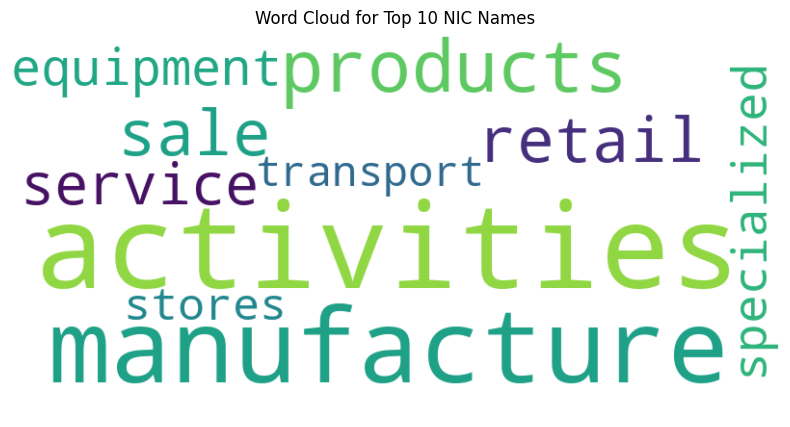

In [ ]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()


In [ ]:
import plotly.express as px

# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar plot using Plotly
fig = px.bar(x=top_words, y=word_counts, labels={'x': 'Industry', 'y': 'Frequency'},
             title='Top 10 Industries by Frequency')
fig.show()


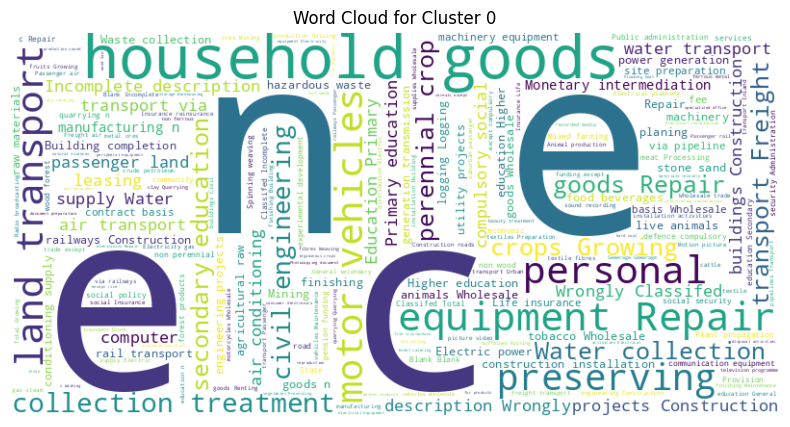

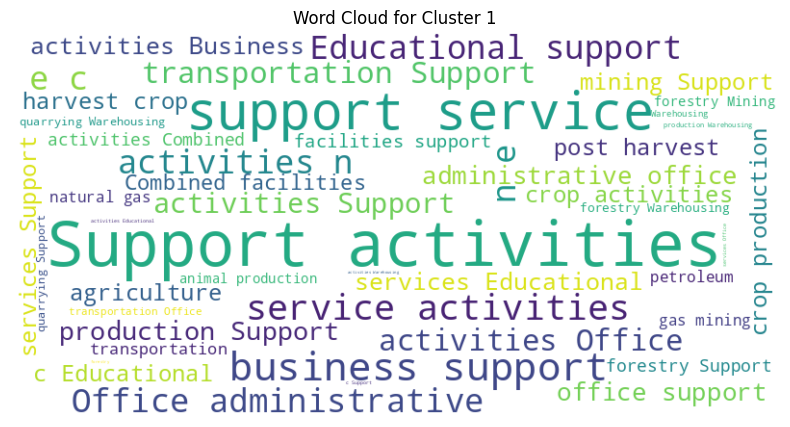

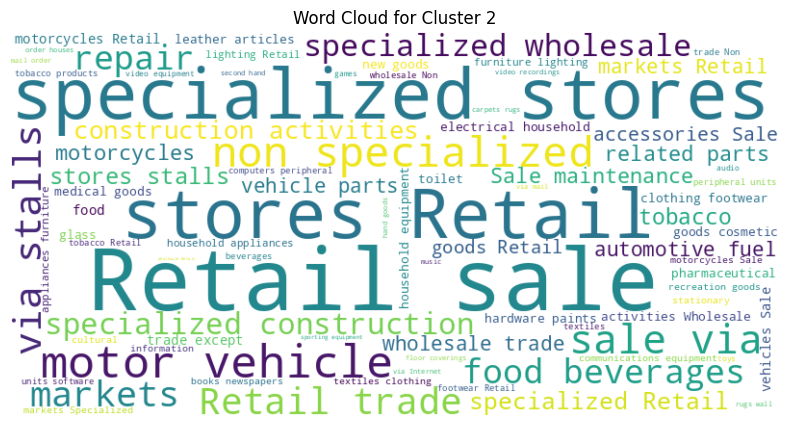

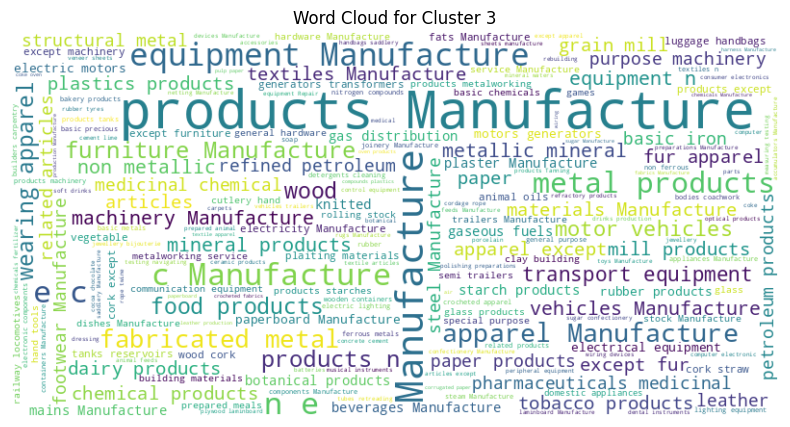

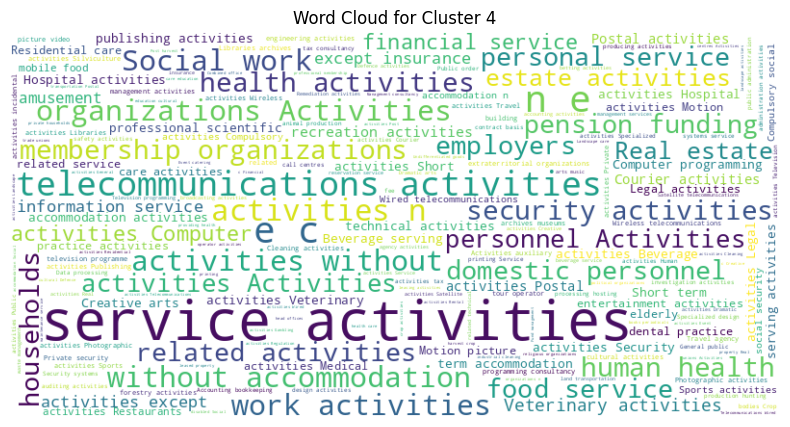

In [ ]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# # Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['NIC Name'])

# KMeans Clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    text_for_cluster = df[df['Cluster'] == cluster]['NIC Name']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(df['NIC Name'])



In [ ]:
# Count the frequency of each 'NIC Name'
nic_name_counts = df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()


In [ ]:
import plotly.express as px

# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_df = df[df['NIC Name'].isin(top_10_nic_names)]

# Create a pie chart to visualize the distribution of the top 10 'NIC Name'
fig = px.pie(
    top_10_df,
    names='NIC Name',
    title='Distribution of Top 10 NIC Name Categories',
    hole=0.3  # This adds a hole in the middle to make it a donut chart (optional)
)

# Show the pie chart
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'top_10_df' is a DataFrame containing the top 10 'NIC Name'
fig = px.box(
    top_10_df,
    x='NIC Name',
    y='Main Workers - Total -  Persons',
    title='Box plot of Main Workers - Total - Persons by Top 10 NIC Name'
)

# Adjust layout for better readability
fig.update_layout(
    xaxis_title='NIC Name',
    yaxis_title='Main Workers - Total - Persons',
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    width=900,  # Adjust width to match figsize in matplotlib
    height=600
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame and contains a 'Cluster' column
fig = px.scatter(
    df,
    x='Main Workers - Total -  Persons',
    y='Main Workers - Rural -  Persons',
    color='Cluster',  # This adds the hue effect for different clusters
    title='Main Workers - Total vs Rural - Clustered',
    color_continuous_scale='viridis',  # Similar to seaborn's 'viridis' palette
    labels={
        'Main Workers - Total -  Persons': 'Main Workers - Total - Persons',
        'Main Workers - Rural -  Persons': 'Main Workers - Rural - Persons'
    }
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Main Workers - Total - Persons',
    yaxis_title='Main Workers - Rural - Persons',
    width=900,  # Adjust width to match the previous plot size
    height=600
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame and contains a 'Cluster' column
fig = px.scatter(
    df,
    x='Main Workers - Total -  Persons',
    y='Main Workers - Urban -  Persons',
    color='Cluster',  # This adds color differentiation for clusters
    title='Main Workers - Total vs Urban - Clustered',
    color_continuous_scale='viridis',  # Similar to seaborn's 'viridis' palette
    labels={
        'Main Workers - Total -  Persons': 'Main Workers - Total - Persons',
        'Main Workers - Urban -  Persons': 'Main Workers - Urban - Persons'
    }
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Main Workers - Total - Persons',
    yaxis_title='Main Workers - Urban - Persons',
    width=900,  # Adjust width
    height=600  # Adjust height
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'top_10_df' is your DataFrame with the top 10 'NIC Name' values
fig = px.box(
    top_10_df,
    x='NIC Name',
    y='Marginal Workers - Total -  Persons',
    title='Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name'
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='NIC Name',
    yaxis_title='Marginal Workers - Total - Persons',
    xaxis_tickangle=-90,  # Rotate x-axis labels by 90 degrees
    width=900,  # Adjust width
    height=600  # Adjust height
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Scatter plot using Plotly
fig = px.scatter(
    top_10_df,
    x='Marginal Workers - Total -  Persons',
    y='Marginal Workers - Rural -  Persons',
    color='Cluster',  # Color by cluster
    title='Marginal Workers - Total vs Rural - Clustered',
    color_continuous_scale='Viridis'  # Use a similar color palette like 'viridis'
)

# Update axis labels
fig.update_layout(
    xaxis_title='Marginal Workers - Total - Persons',
    yaxis_title='Marginal Workers - Rural - Persons',
    width=900,  # Adjust width
    height=600  # Adjust height
)

# Show the interactive plot
fig.show()


In [ ]:
import plotly.express as px

# Scatter plot using Plotly
fig = px.scatter(
    top_10_df,
    x='Marginal Workers - Total -  Persons',
    y='Marginal Workers - Urban -  Persons',
    color='Cluster',  # Color points by cluster
    title='Marginal Workers - Total vs Urban - Clustered',
    color_continuous_scale='Viridis'  # Use 'viridis' color palette similar to Seaborn
)

# Update axis labels and figure size
fig.update_layout(
    xaxis_title='Marginal Workers - Total - Persons',
    yaxis_title='Marginal Workers - Urban - Persons',
    width=900,  # Set width
    height=600  # Set height
)

# Show the interactive plot
fig.show()
